# NETFLIX: Business Case Study

#### By: Karan Agarwal

## Section 1: Problem Statement and Scope

#### ↠ Business Context

Netflix is one of the world’s leading video streaming platforms with over 222 million paid subscribers globally and a content library of more than 10,000 movies and TV shows. The platform operates across multiple countries and serves diverse audience preferences in terms of language, genre, culture, and viewing behaviour.

With increasing competition from other OTT platforms, Netflix must continuously optimize:

• What type of content to produce

• Where to invest geographically

• Which genres and formats drive the highest engagement

All such decisions must be data-driven to reduce risk and maximize return on investment.

#### ↠ Problem Statement

The objective of this case study is to analyze Netflix’s content dataset and generate actionable, data-backed insights that can help Netflix decide:

• Which type of content (Movies vs TV Shows) to focus on

• Which genres are most in demand

• Which countries provide high growth opportunities

• When is the best time to launch new content

• Which directors and actors contribute significantly to the platform

• How Netflix’s content strategy has evolved over time

The final goal is to translate these insights into clear business recommendations for content production and market expansion.

#### ↠ Business Objectives

The analysis aims to support Netflix in:

• Optimizing content production strategy

• Improving regional market penetration

• Enhancing customer engagement and retention

• Identifying high-performing content types and genres

• Supporting data-driven investment decisions

#### ↠ Dataset Description

The dataset contains information about all movies and TV shows available on Netflix up to mid-2021. Key attributes include:

Column Name	Description

• Show_id:	Unique identifier of each movie or TV show

• Type:	Indicates whether the title is a Movie or TV Show

• Title:	Name of the content

• Director:	Director of the content

• Cast:	 Actors involved

• Country:	Country of production

• Date_added:	Date when the content was added to Netflix

• Release_year: 	Original release year

• Rating:	Age-based content rating

• Duration: 	Length in minutes or number of seasons

• Listed_in:  	Genre/category of the content

• Description:  	Brief summary of the title

#### ↠ Key Analytical Questions

The analysis is structured around the following core business questions:

• What type of content is available across different countries?

• How has the number of movies and TV shows changed over the years?

• What is the comparison between TV Shows and Movies?

• Which genres dominate Netflix’s content library?

• When is the most effective time to launch new TV shows?

• Which directors and actors appear most frequently?

• Is Netflix shifting its focus toward TV Shows in recent years?

• How does content distribution vary geographically?

#### ↠ Constraints & Assumptions

The dataset includes only titles listed on Netflix up to mid-2021.

Popularity or viewership metrics are not available; analysis is based purely on content availability.

Missing values in fields like country, cast, and director are treated as “Unknown” where required.

Multiple values in fields like cast, country, and genre are split and unnested for analysis.

# SECTION 2: Data Understanding & Basic Metrics

### 2.1 Importing All the Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

### 2.2 Loading the Dataset

In [9]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2.3 Shape of the Dataset

In [40]:
df.shape

(8807, 12)

#### Interpretation:
The Netflix dataset consists of 8807 rows and 12 columns.
Each row represents a unique movie or TV show available on the Netflix platform.

### 2.4 Data Types & Non-Null Counts

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Interpretation:
The dataset consists of 8,807 records and 12 variables.

All columns except director, cast, country, date_added, rating, and duration contain complete data.

The dataset contains primarily categorical attributes, represented as object data types, along with one numerical variable (release_year as int64).

Some important observations:

• Director has only 6,173 non-null values, indicating a large number of missing entries.

• Cast and Country are also partially missing.

• Date_added, Rating, and Duration have a small number of missing values.

These observations confirm that missing value handling is a necessary step before performing advanced analysis.

### 2.5 Missing Value Detection

In [51]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

#### Interpretation:
Missing values are primarily observed in the following columns:

• Director

• Country

• Cast

• Date_added

These missing values are handled appropriately in later stages of the analysis depending on the business requirement.

### 2.6 Statistical Summary ( Numerical Columns Only )

In [63]:
df[['release_year']].describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### Interpretation:
The statistical summary of the numerical variable release_year shows that:

• The earliest content in the dataset was released in 1925.

• The most recent content was released in 2021.

• The average release year is approximately 2014, indicating that most content on Netflix is relatively recent.

• 50% of the content was released after 2017, suggesting a strong focus on newer productions.

This highlights Netflix’s strategic emphasis on modern and recent content to align with current audience preferences.

### 2.7 Processing 'Date' columns

In [56]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

df[['date_added','added_year','added_month']].head()

,date_added,added_year,added_month
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


#### Interpretation:
The date_added column was converted into a proper datetime format.

New features such as added_year and added_month were extracted to enable time-series analysis.

# Section 3: Non-graphical Analysis

### 3.1 Unique Values in Each Column

In [75]:
df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1699
release_year      74
rating            17
duration         220
listed_in        514
description     8775
added_year        14
added_month       12
dtype: int64

#### Interpretation:

The dataset contains 8,807 unique titles, which confirms that each row represents a distinct movie or TV show.

The Type column has only 2 unique values (Movie and TV Show).

The Country column has 748 unique values, indicating a wide geographic spread of content.

The Listed_in (Genre) column contains 514 unique genre combinations, showing strong content diversity.

The Rating column has 17 unique values, reflecting a broad age classification range.

### 3.2 Value Count of Content Type (Movies vs TV Shows)

In [79]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

#### Interpretation:
The dataset shows that Movies significantly outnumber TV Shows on the Netflix platform.

This indicates that Netflix’s content library is currently more movie-heavy, although TV Shows may play a different role in long-term user engagement.

### 3.3 Top 10 Countries by Number of Titles

In [83]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

#### Interpretation:

The United States and India contributes the highest number of titles on Netflix.

Other major contributors include United Kingdom, Japan, South Korea, and Canada.

This highlights Netflix’s strong dependence on the U.S. market, while also indicating significant growth potential in Asian region.

### 3.4 Ratings Distribution

In [87]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

#### Interpretation:

The most common ratings on Netflix are TV-MA, TV-14, TV- PG and R.

This suggests that Netflix’s content library is strongly oriented toward a mature and young-adult audience, with relatively fewer titles dedicated strictly to children.

### 3.5 Top 10 Release Years

In [91]:
df['release_year'].value_counts().head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

#### Interpretation:

The highest number of titles were released in recent years, especially after 2015.

This reflects Netflix’s aggressive content expansion strategy in the last decade.

### 3.6 Genre (Listed_in) – Top 10 Categories

In [96]:
#Splitting 'Listed_in' column, since the column contains multiple genres in one cell
genres = df['listed_in'].str.split(',').explode().str.strip()

genres.value_counts().head(10)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

#### Interpretation:

The most dominant genres on Netflix include Dramas, Comedies, Documentaries, International Movies and TV Shows.

This indicates strong audience demand for both entertainment-driven and informational content.

### 3.7 Top 10 Directors by Number of Titles

In [106]:
#Splitting 'director' column, since the column contains multiple names of director in one cell
directors = df['director'].dropna().str.split(',').explode().str.strip()

directors.value_counts().head(10)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64

#### Interpretation:

A small group of directors contribute disproportionately to Netflix’s content library. This suggests that Netflix may be maintaining long-term partnerships with a few prolific creators.

### 3.8 Top 10 Actors by Frequency

In [108]:
#Splitting 'cast' column, since the column contains multiple names of actors in one cell
actors = df['cast'].dropna().str.split(',').explode().str.strip()

actors.value_counts().head(10)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

#### Interpretation:

Several actors appear repeatedly across different titles, indicating that Netflix frequently works with a core group of popular performers to attract viewers.

# Section 4: Visual Analysis

## SECTION 4.1: Univariate Analysis

### 4.1.1 Content Type Distribution (Movies vs TV Shows)

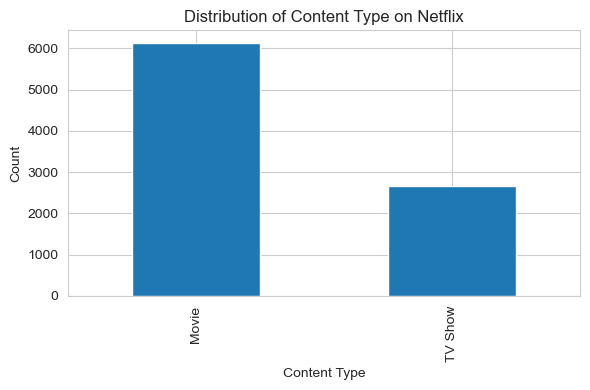

In [11]:
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Interpretation:
The bar chart shows that Movies dominate the Netflix content library, forming a significantly larger portion than TV Shows.

This indicates that Netflix historically focused more on movie-based content, while TV shows may be used more strategically for user retention.

### 4.1.2 Ratings Distribution

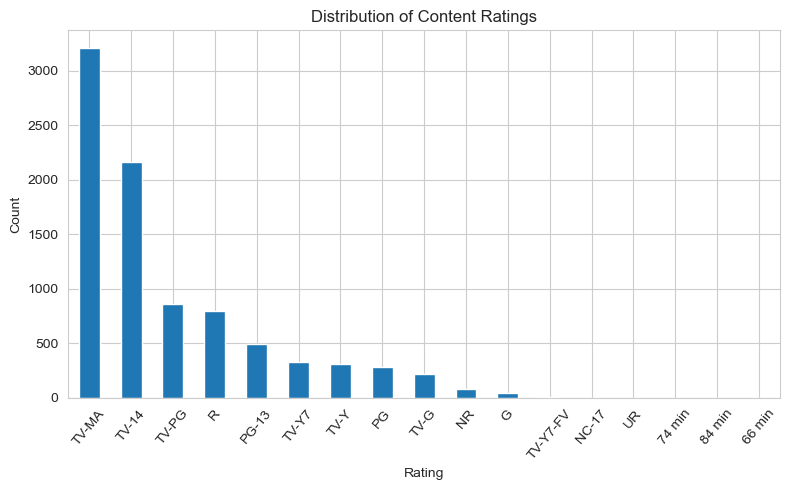

In [19]:
plt.figure(figsize=(8,5))
df['rating'].value_counts().plot(kind='bar')
plt.title("Distribution of Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

#### Interpretation:

The most common ratings are TV-MA, TV-14, TV-PG, and R, which indicates that the majority of Netflix content is targeted toward a mature and young-adult audience.

Relatively fewer titles are meant exclusively for children, suggesting an opportunity to expand the family and kids segment for future growth.

### 4.1.3 Release Year Distribution

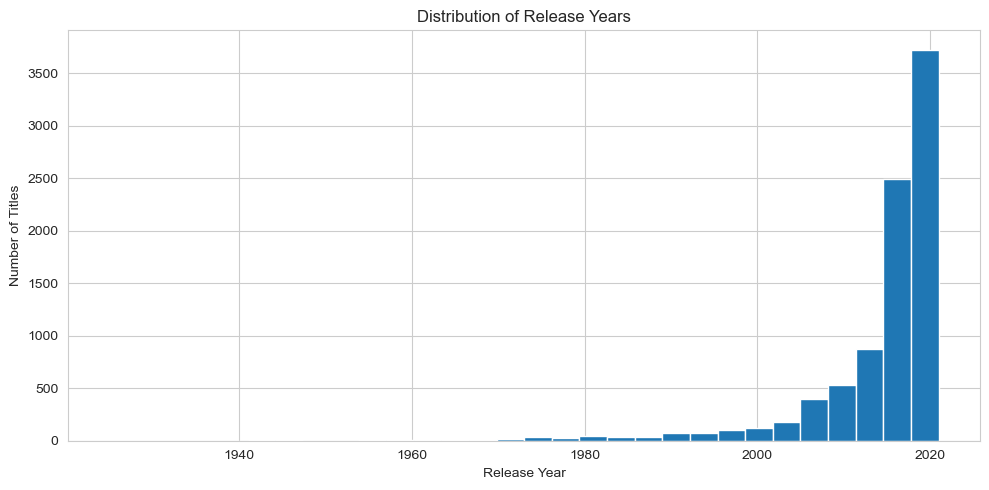

In [25]:
plt.figure(figsize=(10,5))
plt.hist(df['release_year'], bins=30)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

#### Interpretation:
The histogram reveals that a large portion of content was released after 2010, with a strong concentration after 2015.

This confirms Netflix’s strategic shift toward recent and contemporary content, aligning with modern viewing preferences.

### 4.1.4 Movie Duration Distribution (TV Shows are excluded)

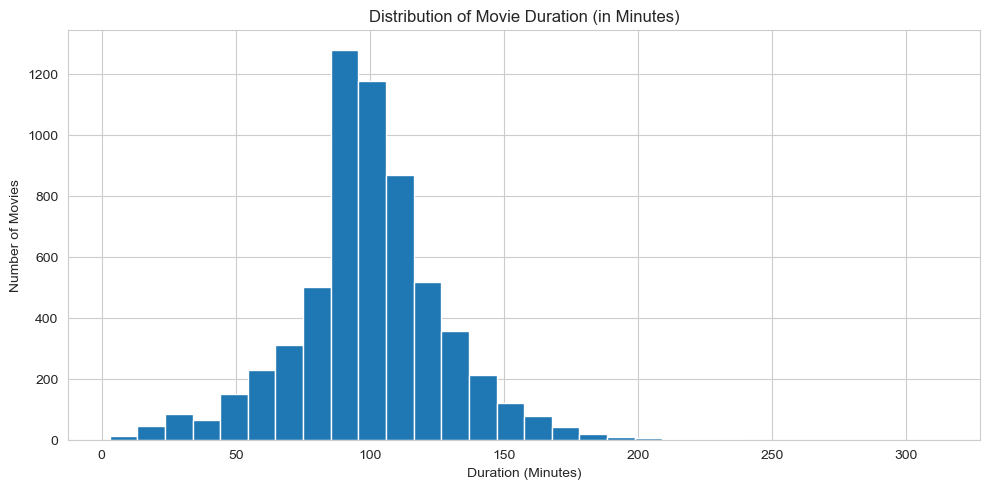

In [29]:
movie_df = df[df['type'] == 'Movie'].copy()

movie_df['movie_minutes'] = movie_df['duration'].str.replace(' min', '', regex=False)
movie_df['movie_minutes'] = pd.to_numeric(movie_df['movie_minutes'], errors='coerce')

plt.figure(figsize=(10,5))
plt.hist(movie_df['movie_minutes'].dropna(), bins=30)
plt.title("Distribution of Movie Duration (in Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

#### Interpretation:
Most movies on Netflix fall between 80 to 120 minutes, which is the standard feature-length format.

Extremely long or very short movies are relatively rare, suggesting that Netflix focuses on mainstream audience-friendly formats.

### 4.1.5 Genre Distribution (Top 10 Genres)

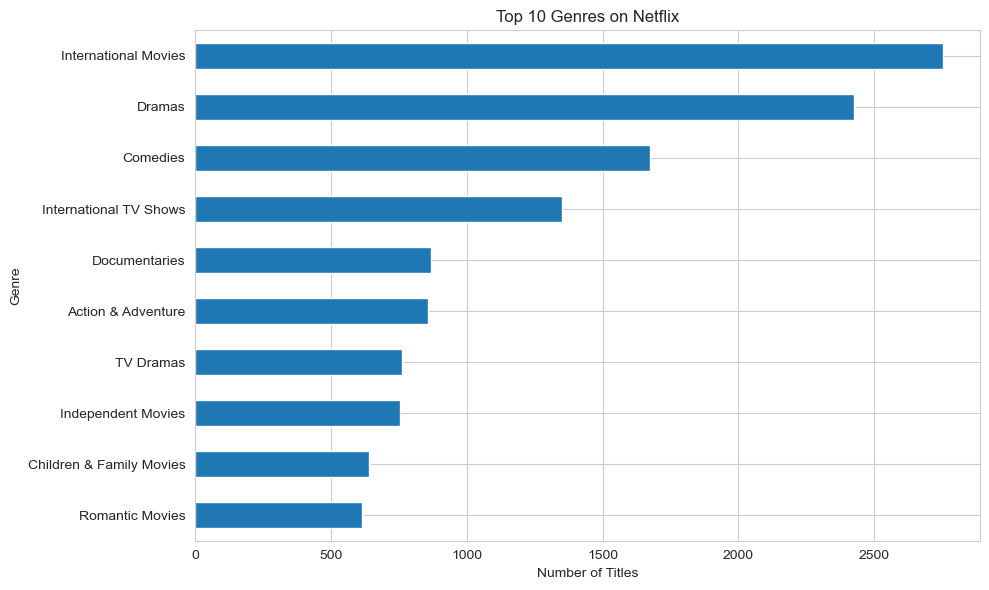

In [37]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,6))
top_genres.sort_values().plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

#### Interpretation:
The most dominant genres on Netflix are Dramas, Comedies, Documentaries, and International Movies and TV Shows.

This indicates that Netflix prioritizes content with high emotional engagement, entertainment value, and global appeal.

## SECTION 4.2 – Bivariate Analysis

### 4.2.1 Content Type vs Release Year (Trend Analysis)

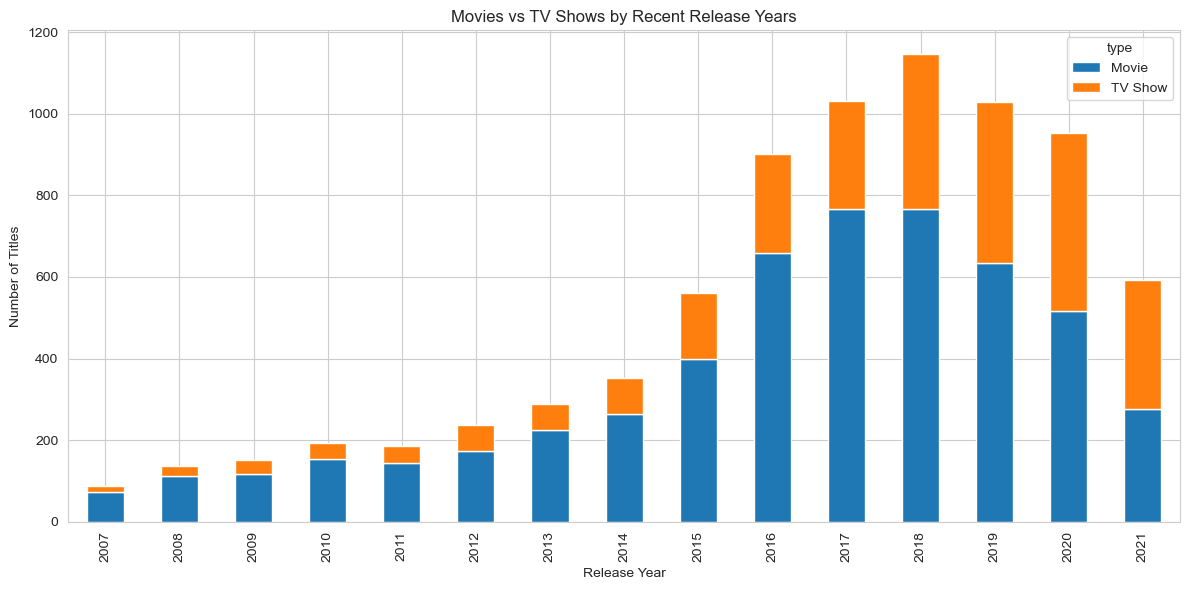

In [42]:
type_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

type_year.tail(15).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Movies vs TV Shows by Recent Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

#### Interpretation:
In recent years, the proportion of TV Shows has increased significantly compared to earlier years, while Movies still dominate in absolute numbers.
    
This indicates a strategic shift toward TV shows, as they encourage longer user engagement and repeat platform visits.

### 4.2.2 Content Type vs Country (Top 6 Countries)

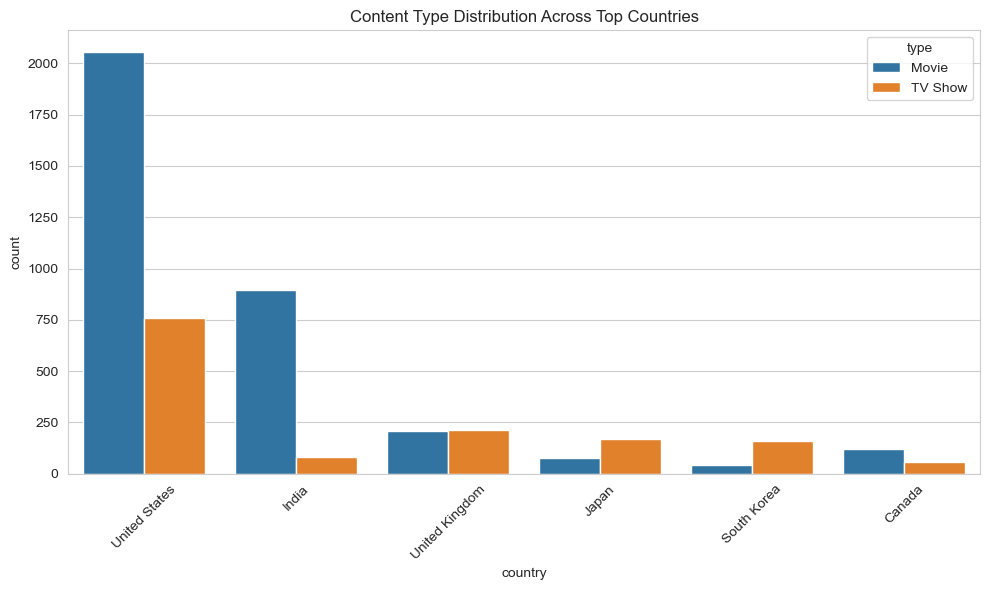

In [46]:
top_countries = df['country'].value_counts().head(6).index
country_type = df[df['country'].isin(top_countries)]

plt.figure(figsize=(10,6))
sns.countplot(data=country_type, x='country', hue='type')
plt.title("Content Type Distribution Across Top Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Interpretation:
The United States dominates both movie and TV show production.

Countries like India, the United Kingdom and Canada contribute more heavily to Movies than TV Shows, indicating a potential growth opportunity for local TV series production in these markets.

Whereas, Japan and the South Korea contribute more to TV Shows than to Movies, indicating a potential growth opportunity for Movies production.

### 4.2.3 Rating vs Content Type

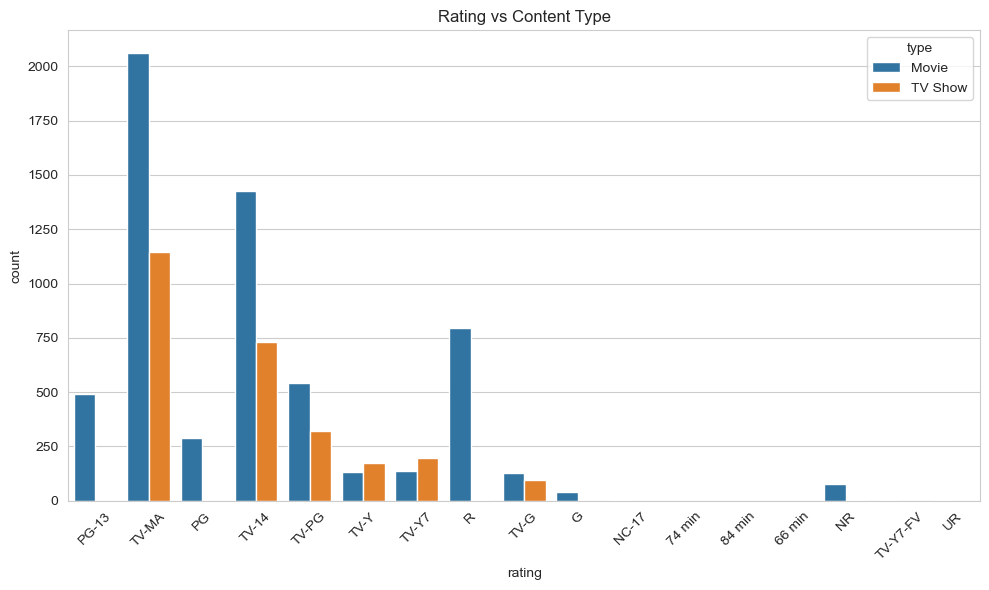

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', hue='type')
plt.title("Rating vs Content Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Interpretation:
Mature ratings such as TV-MA and TV-14 dominate both Movies and TV Shows, whereas youth-based ratings are more limited.

This suggests Netflix’s primary audience lies in the young-adult and adult demographics, with potential to grow the kids and family segment further.

### 4.2.4 Number of Titles Added Over Time (Growth Trend)

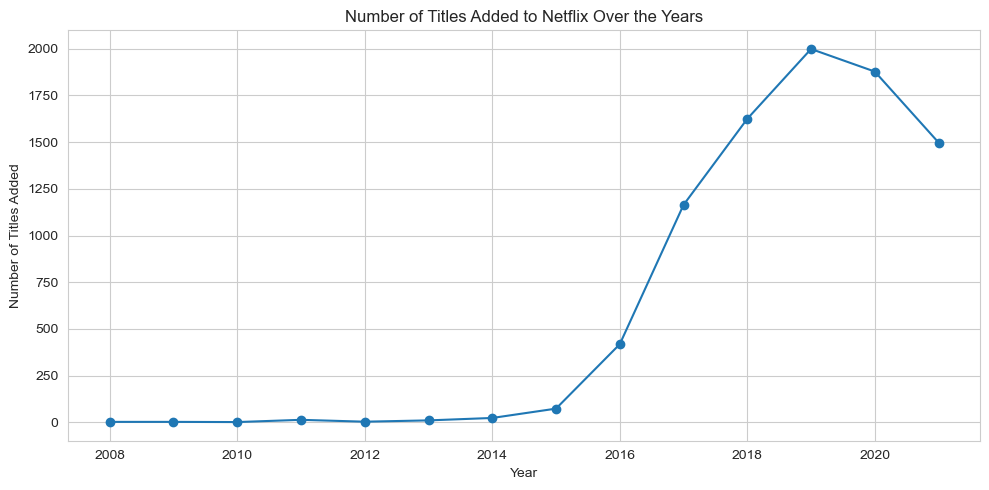

In [58]:
year_added = df['added_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_added.plot(kind='line', marker='o')
plt.title("Number of Titles Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.tight_layout()
plt.show()

#### Interpretation:
Netflix experienced rapid growth in content additions after 2015, with a sharp rise until 2020.

This reflects Netflix’s aggressive investment in content production during its global expansion phase.

### 4.2.5 Genre vs Content Type (Top 5 Genres)

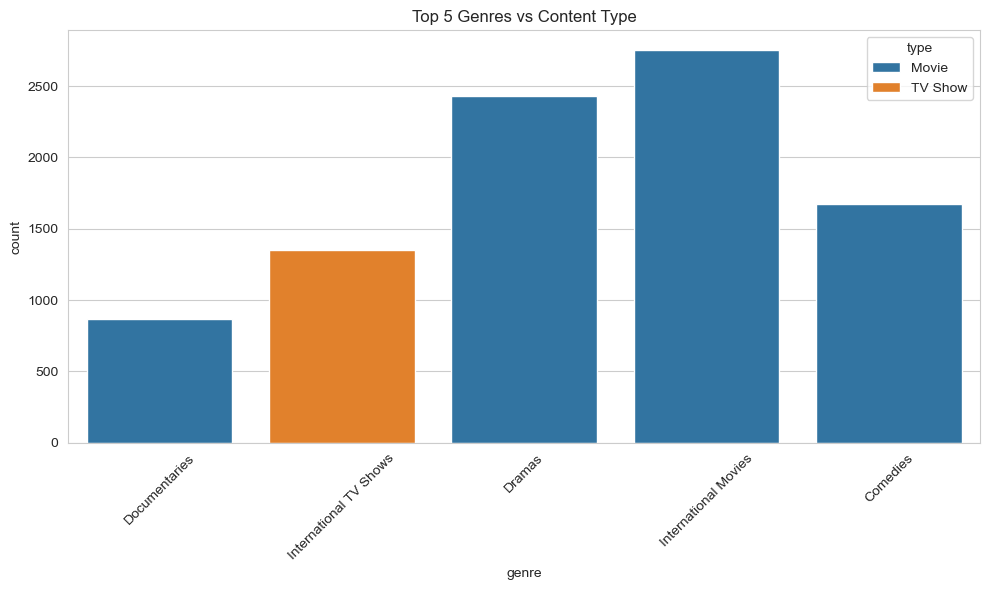

In [62]:
df_genre = df.copy()
df_genre['genre'] = df_genre['listed_in'].str.split(',')
df_genre = df_genre.explode('genre')
df_genre['genre'] = df_genre['genre'].str.strip()

top_5_genres = df_genre['genre'].value_counts().head(5).index
df_genre_top = df_genre[df_genre['genre'].isin(top_5_genres)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_genre_top, x='genre', hue='type')
plt.title("Top 5 Genres vs Content Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Interpretation:
The chart shows a clear dominance of Movies across most of the top genres, especially in Dramas, International Movies, and Comedies, where Movies significantly outnumber TV Shows.

International TV Shows appear almost exclusively as TV Shows, which is expected given the genre definition.

Documentaries are primarily Movies with very few TV Shows, indicating that Netflix mainly releases documentaries as standalone films rather than episodic series.

# SECTION 5: MISSING VALUE & OUTLIER CHECK

### 5.1 Missing Value Count

In [67]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        98
added_year        98
added_month       98
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

#### Interpretation:
The columns with the highest number of missing values are Director, Cast, Country, and Date_added.

Columns added_year and added_month are duly created out of the date_added colunn. 

### 5.2 Missing Value Percentage by Column

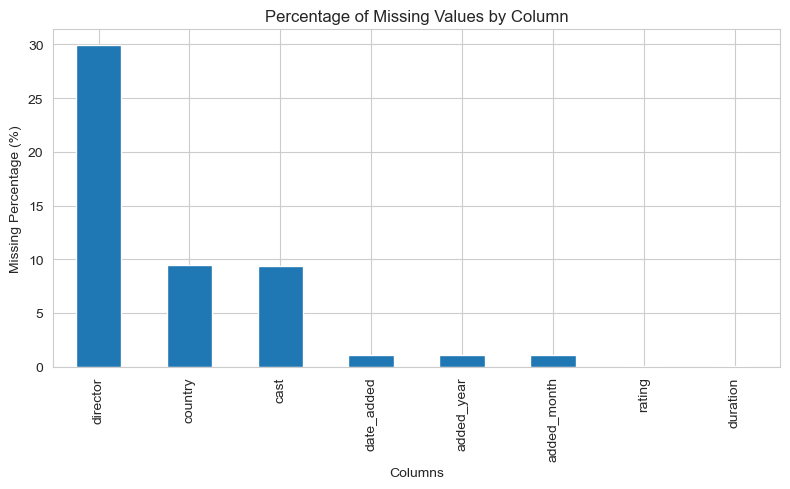

In [74]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing_percent.plot(kind='bar')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Missing Percentage (%)")
plt.tight_layout()
plt.show()

#### Interpretation:
The bar chart clearly shows that the highest percentage of missing values ocorre in the Director, Cast, and Country columns, while only a very small proportion of records are missing in Date_added, Rating, and Duration.

Since the missing values are concentrated mainly in descriptive metadata fields rather than core identifiers, the overall dataset remains highly usable for analytical and business decision-making purposes.

### 5.3 Missing Value Treatment

In [78]:
df['director_filled'] = df['director'].fillna('Unknown')
df['cast_filled'] = df['cast'].fillna('Unknown')
df['country_filled'] = df['country'].fillna('Unknown')
df['rating_filled'] = df['rating'].fillna('Unrated')

#### Interpretation:

Missing values in Director, Cast, Country, and Rating were filled with the placeholder value “Unknown” and "Unrated"(For Rating) strictly for analytical purposes.

This ensures that missing entries do not get dropped unintentionally during grouping or visualization, while still preserving the integrity of the original dataset.

### 5.4 Outlier Detection – Movie Duration Only

In [88]:
movie_df = df[df['type'] == 'Movie'].copy()

movie_df['movie_minutes'] = movie_df['duration'].str.replace(' min', '', regex=False)
movie_df['movie_minutes'] = pd.to_numeric(movie_df['movie_minutes'], errors='coerce')

movie_df['movie_minutes'].describe().round(2)

count    6128.00
mean       99.58
std        28.29
min         3.00
25%        87.00
50%        98.00
75%       114.00
max       312.00
Name: movie_minutes, dtype: float64

#### Interpretation:
The summary statistics show that most movies lie within a typical feature-length range.

Extremely short or extremely long durations exist but are very few in number, suggesting the presence of mild outliers.

### 5.5 Outlier Visualization (Boxplot)

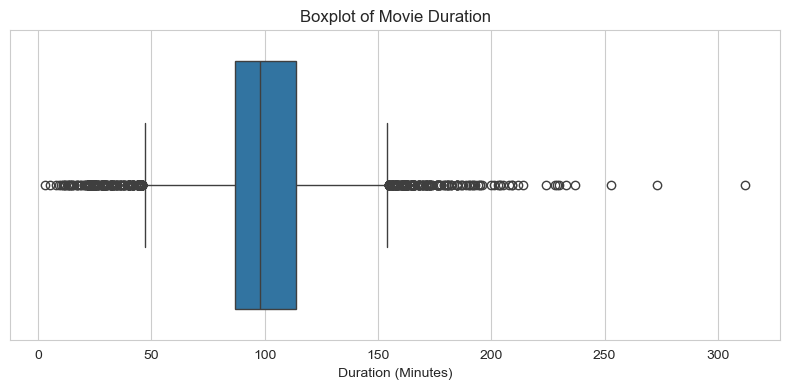

In [91]:
plt.figure(figsize=(8,4))
sns.boxplot(x=movie_df['movie_minutes'])
plt.title("Boxplot of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.tight_layout()
plt.show()

#### Interpretation:
The boxplot shows the presence of a few extreme-duration outliers, mainly very long movies.

Since these outliers represent real content and not data errors, they are retained for analysis, as they form part of Netflix’s legitimate catalog.

# SECTION 6: INSIGHTS FROM NON-GRAPHICAL & VISUAL ANALYSIS

#### 6.1 Range of Key Attributes

The release year of content ranges from 1925 to 2021, indicating that Netflix hosts both classic and modern content.

However, the majority of content has been released after 2010, with a strong concentration after 2015.

Movie durations mostly fall within the 80–120 minute range, confirming that Netflix largely focuses on standard feature-length films.

TV Shows mostly have 1–2 seasons, suggesting a preference for limited-series formats over very long-running shows.

#### 6.2 Distribution of Variables

Movies dominate the platform compared to TV Shows, as seen in both value counts and bar charts.

The most common content ratings are TV-MA, TV-14, and R, indicating a strong focus on young-adult and adult audiences.

Dramas, International Movies, Comedies, and Documentaries are the most frequent genres, showing that Netflix prioritizes:

• Emotion-driven storytelling (Dramas)

• Global audience appeal (International Movies)

• Entertainment & information (Comedies & Documentaries)

The United States is the largest contributor of content, followed by India, the United Kingdom, Canada, and Japan.

#### 6.3 Relationship Between Key Variables (From Bivariate Analysis)

• Content growth over time:
The number of titles added to Netflix has increased sharply after 2015, showing Netflix’s aggressive global expansion and investment phase.

• Content Type vs Release Year:
While Movies still dominate in total count, TV Shows have grown significantly in recent years, indicating Netflix’s increasing focus on series-based content for long-term user retention.

• Content Type vs Country:
The United States leads in both Movies and TV Shows.
India and the UK show a strong dominance of Movies but comparatively fewer TV Shows, suggesting a growth opportunity for regional TV series.

• Rating vs Content Type:
Mature-rated content dominates in both Movies and TV Shows.
This highlights Netflix’s emphasis on adult storytelling, while also revealing potential to grow family- and kids-oriented content segments.

• Genre vs Content Type:
For dominant genres such as Dramas, International Movies, and Comedies, Movies form the majority share.
International TV Shows are purely series-based, and Documentaries are largely released as Movies, indicating a format preference by genre.

#### ↠ Overall Summary of Insights

Netflix’s content library is predominantly movie-centric, but the importance of TV Shows is steadily increasing.

The platform is highly U.S.-focused, but international markets—especially India and Asia—show strong growth potential.

Netflix prioritizes mature content and emotionally engaging genres.

Recent years show a clear acceleration in content production, supporting Netflix’s strategy of rapid global expansion.

# SECTION 7: BUSINESS INSIGHTS


### 1. Netflix’s Content Strategy is Primarily Movie-Driven

The analysis shows that Movies form the majority of Netflix’s content library across most genres and countries. This indicates that Netflix historically relied on movie-based content to scale its catalog quickly and attract a broad audience base. However, the recent rise of TV Shows suggests a gradual strategic shift.

### 2. TV Shows are Becoming a Key Tool for User Retention

Although Movies still dominate in volume, TV Shows have grown significantly in recent years. Since TV Shows encourage binge-watching and repeated engagement, this reflects Netflix’s increasing focus on subscriber retention rather than just acquisition.

### 3. Strong Dependence on the United States Market

The United States is the largest contributor of content in both Movies and TV Shows. This indicates:

• A strong production and distribution base in the U.S.

• Potential over-dependence on a single geography, which may pose long-term saturation risks.

### 4. High Growth Potential in International Markets

Countries such as India, the United Kingdom, Japan, and other Asian regions show a high volume of Movies but comparatively fewer TV Shows. This suggests:

• Strong audience demand exists in these regions.

• Netflix can grow further by investing in regional TV series and local storytelling.

### 5. Netflix Strongly Targets the Adult Audience Segment

The dominance of ratings such as TV-MA, TV-14, and R shows that Netflix’s core audience consists largely of young adults and mature viewers.

This reflects a strategic emphasis on:

• Crime

• Thrillers

• Dark dramas

• Mature documentaries

At the same time, this also highlights an underutilized opportunity in the family and kids segment.

### 6. Genre Strategy is Focused on High-Engagement Content

The most common genres are:

• Dramas

• International Movies

• Comedies

• Documentaries

These genres:

• Generate high emotional engagement

• Offer global relatability

• Perform well across cultures

This indicates that Netflix prioritizes universally appealing storytelling formats.

### 7. Rapid Content Expansion After 2015

The sharp rise in the number of titles added after 2015 reflects Netflix’s:

Aggressive investment phase

Entry into multiple global markets

Focus on building a massive original content library to outperform competitors

This expansion phase also aligns with Netflix’s original content strategy.

### ↠ Overall Business Meaning

Netflix’s strategy reflects a combination of:

• High-volume movie production for scale

• Strategic TV Show investments for retention

• Heavy reliance on U.S. content

• Rapid international market expansion

• Strong emphasis on mature and emotionally engaging content

# SECTION 8: RECOMMENDATIONS

Based on the complete analysis of Netflix’s content library, user segmentation, country-wise distribution, and genre trends, the following actionable business recommendations are proposed:

### 1. Increase Investment in Regional TV Shows

While Movies dominate most countries, TV Shows are still underrepresented in international markets such as India, Japan, and the UK.

Netflix should:

• Invest more in regional-language TV series

• Focus on culturally relevant storytelling

• Encourage local production partnerships

This will help improve user retention and regional market penetration.

### 2. Strengthen the Family & Kids Content Segment

The library is heavily skewed toward mature-rated content (TV-MA, R). To expand its subscriber base:

• Netflix should increase family-friendly and children’s programming

• Introduce educational series and animated content

• Target household subscriptions and younger demographics

This can significantly improve long-term customer lifetime value.

### 3. Focus on High-Engagement, High-Return Genres

Genres like Dramas, Comedies, and Documentaries dominate the platform and show consistent demand. Netflix should:

• Continue prioritizing these genres

• Develop short-season original series in these categories

• Expand low-cost, high-impact documentary productions

These genres offer high engagement at controlled production costs.

### 4. Expand International Original Content Production

Netflix currently relies heavily on U.S.-produced content. To reduce geographical dependency and increase global relevance:

• Increase quota for international originals

• Promote cross-cultural storytelling

• Use region-specific viewing data to guide commissioning

This will improve brand penetration and subscriber growth across emerging markets.

### 5. Maintain a Balanced Mix of Movies and TV Shows

Movies drive content volume and discovery, while TV Shows drive user retention. Netflix should:

• Maintain a balanced portfolio of both

• Use Movies for new-user attraction

• Use TV Shows for binge engagement and subscription stickiness

### 6. Optimize Content Release Strategy

Content addition trends show periodic spikes in platform uploads. Netflix can:

• Schedule major releases during high-engagement periods

• Align marketing campaigns with peak content release windows

• Leverage festival seasons and holiday periods for global launches

### 7. Strengthen Long-Term Collaborations with High-Performing Creators

The analysis reveals a small group of frequently appearing directors and actors. Netflix should:

• Offer multi-project contracts to high-performing creators

• Build exclusive creator partnerships

• Encourage content franchises and sequel-based storytelling

This improves brand consistency and viewer loyalty.

### ↠ Final Strategic Summary

If Netflix implements these recommendations, it can:

• Improve user retention through TV Shows

• Unlock international growth through regional content

• Expand into family-oriented segments

• Reduce overdependence on the U.S. market

• Maximize return on content investment through data-driven production

####                                                         ⟫⟫⟫⟫⟫⟫ Thank You ! ⟪⟪⟪⟪⟪⟪